In [69]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X_train_temp= pd.read_csv('./X_train_all_feature.csv')
y_train_temp= pd.read_csv('./y_train_all_feature.csv')
X_test_temp= pd.read_csv('./X_test_all_feature.csv')
y_test_temp= pd.read_csv('./y_test_all_feature.csv')
X_test_temp.fillna(0,inplace=True)



In [70]:
X_train_temp.shape

(4328, 105)

In [71]:
X_train_temp.drop(columns=['TotalTeDiagCode','TotalTeProcCode'],inplace=True)
X_test_temp.drop(columns=['TotalTeDiagCode','TotalTeProcCode'],inplace=True)

train=pd.concat([X_train_temp,y_train_temp],axis=1)

test=pd.concat([X_test_temp,y_test_temp],axis=1)

In [25]:
df=pd.concat([train,test],axis=0)

In [29]:
df.set_index('Provider',inplace=True)
df.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,totalProcCode_4516,totalProcCode_3722,totalProcCode_8151,totalProcCode_8872,totalProcCode_9671,totalProcCode_4513,totalProcCode_5849,totalProcCode_9390,totalProcCode_Other,PotentialFraud
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,213.600000,1068.0,12.000000,12.000000,2615.200000,13460,65380,463.920000,2700,11598,...,0,0,0,0,0,0,0,0,125,0
PRV51004,2.080537,100.0,11.865772,11.959732,2194.899329,20900,327040,622.751678,7410,92790,...,0,0,0,0,0,0,0,0,745,0
PRV51005,3.175966,200.0,11.907296,11.939914,2109.733906,97510,2457840,636.328755,6330,741323,...,0,0,0,0,0,0,0,0,5825,1
PRV51008,53.860465,1068.0,12.000000,12.000000,2570.465116,20500,110530,616.046512,4140,26490,...,0,0,0,0,0,0,0,0,215,0
PRV51011,23.586207,1068.0,12.000000,12.000000,1399.310345,6340,81160,366.724138,1070,21270,...,0,0,0,0,0,0,0,0,290,0


In [133]:
df.to_csv('train_test_all')

# SMOTE

In [124]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state = 0)
X = df.drop(columns = 'PotentialFraud')
y = df['PotentialFraud']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.31, random_state = 0)
X_train, y_train = sm.fit_resample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
steps = [('Rescale', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators =5, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Test PR-AUC is 0.621


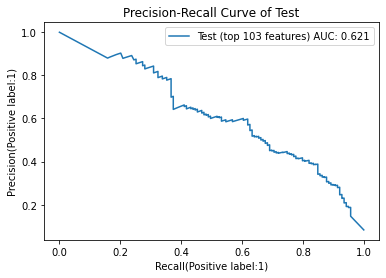

In [126]:

from Metric_Curves import multi_curves 

mp=multi_curves(X_train,y_train,X_test,y_test,model)
mp.plot_PR_test(103)

In [61]:
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)
mp.metrics()

,0,1
0,roc_auc_score(train),0.995
1,roc_auc_score(test),0.911
2,PR-AUC(train),0.995
3,PR-AUC(test),0.574
4,average_precision(train),0.995
5,average_precision(test),0.557
6,precision_score(train),0.963
7,precision_score(test),0.929


# BorderlineSMOTE

In [112]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE
from sklearn.model_selection import train_test_split
bsm = BorderlineSMOTE(random_state = 0)
X = df.drop(columns = 'PotentialFraud')
y = df['PotentialFraud']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.31, random_state = 0)
X_train, y_train = bsm.fit_resample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
steps = [('Rescale', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators =5, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [114]:
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)
mp.metrics()

,0,1
0,roc_auc_score(train),0.996
1,roc_auc_score(test),0.919
2,PR-AUC(train),0.996
3,PR-AUC(test),0.542
4,average_precision(train),0.996
5,average_precision(test),0.538
6,precision_score(train),0.967
7,precision_score(test),0.931


# ADASYN

In [41]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,ADASYN
adasyn = ADASYN(random_state = 0)
X = df.drop(columns = 'PotentialFraud')
y = df['PotentialFraud']
X_train_as, X_test, y_train_as, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = adasyn.fit_resample(X_train_as, y_train_as)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
steps = [('Rescale', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators =5, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [47]:
X_train.shape

(6819, 102)

In [43]:
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)
mp.metrics()

,0,1
0,roc_auc_score(train),0.994
1,roc_auc_score(test),0.915
2,PR-AUC(train),0.993
3,PR-AUC(test),0.562
4,average_precision(train),0.993
5,average_precision(test),0.563
6,precision_score(train),0.963
7,precision_score(test),0.932


# Up-Sampling

In [127]:
X = df.drop(columns = 'PotentialFraud')
y = df['PotentialFraud']

X_train_us, X_test, y_train_us, y_test = train_test_split(X, y, test_size = 0.31, random_state = 0)
#Now resample the train data
df_us = pd.concat([X_train_us, y_train_us], axis = 1)
train_majority = df_us[df_us.PotentialFraud == 0]
train_minority = df_us[df_us.PotentialFraud == 1]
train_majority.shape, train_minority.shape

((3365, 103), (367, 103))

In [128]:
from sklearn.utils import resample
train_minority_upsampled = resample(train_minority, replace = True, n_samples = 199019, random_state = 0)
print(train_majority.shape, train_minority_upsampled.shape)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
X_train = train_upsampled.drop(columns = 'PotentialFraud')
y_train = train_upsampled['PotentialFraud']

(3365, 103) (199019, 103)


In [129]:
steps = [('Rescale', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators =20, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='log2',max_depth=30,min_samples_leaf=10))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)
mp.metrics()

,0,1
0,roc_auc_score(train),1.000
1,roc_auc_score(test),0.930
2,PR-AUC(train),1.000
3,PR-AUC(test),0.683
4,average_precision(train),1.000
5,average_precision(test),0.683
6,precision_score(train),0.999
7,precision_score(test),0.937


# Hyperparameter Tuning

In [55]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
n_estimators = [5,10,15,20]
max_depth = [15, 25, 30]
min_samples_split = [50, 100, 150]
min_samples_leaf = [5,10,30,50,80] 
max_features=['auto', 'sqrt', 'log2']

hyperF = dict(rfc__n_estimators = n_estimators, 
              rfc__max_depth = max_depth,  
              rfc__min_samples_split = min_samples_split, 
              rfc__min_samples_leaf = min_samples_leaf,
              rfc__max_features=max_features)

gridF = GridSearchCV(model, hyperF, cv = 3, scoring='average_precision')
bestF = gridF.fit(X_train, y_train)

In [56]:
bestF.best_params_

{'rfc__max_depth': 25,
 'rfc__max_features': 'auto',
 'rfc__min_samples_leaf': 5,
 'rfc__min_samples_split': 50,
 'rfc__n_estimators': 15}

In [ ]:
{'rfc__max_depth': 15,
 'rfc__max_features': 'auto',
 'rfc__min_samples_leaf': 10,
 'rfc__min_samples_split': 50,
 'rfc__n_estimators': 20}

In [130]:
steps = [('Rescale', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators =15, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='auto',max_depth=25,min_samples_leaf=10))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)
mp.metrics()

,0,1
0,roc_auc_score(train),1.000
1,roc_auc_score(test),0.926
2,PR-AUC(train),1.000
3,PR-AUC(test),0.672
4,average_precision(train),1.000
5,average_precision(test),0.671
6,precision_score(train),0.999
7,precision_score(test),0.938


# Train_test_split ratio=0.31

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=0)

In [155]:
steps = [('Rescale', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators =5, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)
mp.metrics()

,0,1
0,roc_auc_score(train),0.980
1,roc_auc_score(test),0.922
2,PR-AUC(train),0.841
3,PR-AUC(test),0.611
4,average_precision(train),0.841
5,average_precision(test),0.610
6,precision_score(train),0.952
7,precision_score(test),0.933
